# The Party Problem

There are $n$ drunk kids at a party that is presumably getting shut down by the fun police in Cambridge, MA. They (meaning the kids, presumably) grab their coats at random, and the problem is built around thinking about how many people wind up with the correct coat.

### Lame Interview Question 1: Every one finds their coat
The common version of this problem asks "what is the probability that all of the kids wind up with the right coat". This is much easier than the general case. Imagine the list of party guests as a sequence $\{1,2,3,4,...,n-1,n\}$ and the coats they grab as a random permutation of that sequence, such as $\alpha = \{6,1,40,21,9,...\}_n$. There are $n!$ such permutations, and they are all equally likely. The probability of all guests getting the correct coat is the probability that the permutation happens to be the single correct one, i.e. $p(\alpha = \{1,2,3,4,...,n-1,n\}_n)$, which is the probality of one particular permutation, i.e. $p(\alpha = \{1,2,3,4,...,n-1,n\}_n) = \frac{1}{n!}$.

### Lame Interview Question 2: At least r people find their coat
This is still pretty easy, because the permutations that are correct are easily counted. If at least $r$ coats are correctly assigned, then there are $\left(\begin{array}{l}n\\r\end{array}\right)$ ways of choosing wich of the $r$ people wind up with the right coat. Then, while the location of $r$ indices in the sequence is fixed, $n-r$ indices can be assigned arbitrarily.

The number of permutations where at least $r$ are assigned correctly are then:

\begin{equation}
\left(
\begin{array}{l}
n\\
r
\end{array}
\right)(n-r)!
\end{equation}

And the probability of at least $r$ people finding their coat is the number of permutations multiplied with the probability of an individual permutation (that is, $\frac{1}{n!}$):

\begin{equation}
p(\mathrm{\#\ correct} \geq r)=\left(
\begin{array}{l}
n\\
r
\end{array}
\right)\frac{(n-r)!}{n!}
\end{equation}

### Not lame: Exactly r people find their coat
So, then, what's the probability that exactly nobody finds their coat? What's the probability that 2 people find their coat but nobody else does? What's the probability that $r$ out of $n$ people find their coat? After thinking quickly on your feet for two seconds, you realize that the answer is obviously:

\begin{equation}
p(\mathrm{\#\ correct} = r) = \frac{1}{r!}\sum_{s=0}^{n-r} \frac{(-1)^s}{s!}
\end{equation}

The interviewer grunts ambiguously. They never call you back. You never find out why. You can't sleep. You can't eat. You become an anarchist and you declare war on the system.

The first two versions here are what I've come across in interview prep-type materials. I find them a bit annoying, because they represent particular cases that are much simpler than the general case. Applicants in the habit of studying stupid interview questions are rewarded because those answers are easily memorized (false positive). Applicants who intuit the complexity of the general problem, and who don't know the answer beforehand, might become overwhelmed during an interview and fail (false-ish negative).

/ rant

My approach here follows the extraordinary lecture notes https://mast.queensu.ca/~stat455/ by Glen Takahara at the University of Queensland.

As so often, indicator variables help:

\begin{equation}
I_A = \begin{array}{l} 1 \mathrm{\ if\ outcome\ in\ A}\\0 \mathrm{\ if\ outcome\ in\ A^c} \end{array}
\end{equation}

Which means that:
\begin{equation}
\mathbb{E}(I_A) = 1\times p(A) + 0\times p(A^c)= p(A)
\end{equation}

To indicator variables for different events can also be combined:
\begin{equation}
I_{A\cap B\cap C\cap ...} = I_A I_B I_C ...
\end{equation}

And indicator variables for the complement can be constructed trivially:
\begin{equation}
I_{A^c} = 1 - I_A
\end{equation}

Let $A_i$ be the region of state space in which guest $i$ grabbed the right coat. Let's say a *particular* subset $\{i\}_r$ of $r$ guests grabs their correct coats (for example, $\{i\}_r = \{5,9,11,24,...\}_r)$, and that the set of remaining $n-r$ guests $\{j\}_{n-r}= \{1,2,3,...\}_n\setminus\{i\}_r$ grab the wrong coat. The area of state space that corresponds to this outcome is:

\begin{equation}
A_{\{i\}_r,\{j\}_{n-r}}=\bigcap_{i\in\{i\}_r}A_i\bigcap_{j\in\{j\}_{n-r}}A_j^c
\end{equation}

The event that the outcome lies within that region of configuration space can be described with an indicator function:

\begin{equation}
I_{A_{\{i\}_r,\{j\}_{n-r}}} = \prod_{\{i\}_r}I_{A_i}\prod_{\{j\}_{n-r}}(1-I_{A_j})
\end{equation}

And the probability of those *particular* $r$ people finding their coat is it's expectation value, $p(A_{\{i\}_r,\{j\}_{n-r}}) = \mathbb{E}(I_{A_{\{i\}_r,\{j\}_{n-r}}})$. Good stuff.

The expression above will consist of a bunch of products of indicator variables that describe whether a particular guest wound up with the correct coat. We know that the product of indicator variables corresponds to an indicator variable for the *intersection* of the corresponding subsets of the state space. Explicitly, if it is a product of $s$ indicator variables for some particular set of coats coat $\{k\}_s$:

\begin{equation}
\prod_{k} I_{A_k} = I_{\bigcap_{k}A_k}
\end{equation}

And $\mathbb{E}(I_{\bigcap_{k} A_k}) = p(\bigcap_{k} A_k)$ is the probability of a particular $s$ coats being picked up correctly, which is $(n-s)!/n!$. (There is no binomial factor, because it's one *specific* set of $s$ coats). 

Products of the sort $\prod^n (1-x_i)$ can be expanded:

\begin{equation}
\prod^n (1-x_i) = \sum_{s=0}^n (-1)^s \sum_{1\leq i_1,...,i_s\leq n} x_{i_1}x_{i_2}...x_{i_s}
\end{equation}

The sum $\sum_{1\leq i_1,...,i_s\leq n}$ is over all possible sets of up to $s$ indices that can be drawn from $\{1,2,3,...,n\}$. A simple example with $n=3$:

\begin{equation}
(1-x_1)(1-x_2)(1-x_3) = \underbrace{1}_{s=0} - \underbrace{(x_1 + x_2 + x_3)}_{s=1} + \underbrace{(x_1x_2 + x_2x_3 + x_1x_3)}_{s=2} - \underbrace{(x_1x_2x_3)}_{s=3}
\end{equation}

The number of terms of order $s$ is the amount of ways that $s$ indices can be sampled from $n$ indices, $\left(\begin{array}{l}n\\s\end{array}\right)$. 

Returning to the original problem, then:

\begin{equation}
\begin{array}{ll}
I_{A_{\{i\}_r,\{j\}_{n-r}}} &= \prod_{\{i\}_r}I_{A_i}\prod_{\{j\}_{n-r}}(1-I_{A_j})\\
&=\sum_{s=0}^{n-r} (-1)^s \underbrace{\sum_{n-r\leq j_1,...,j_s\leq n}}_{\mathrm{sum\ of\ }\left(\begin{array}{l}n-r\\s\end{array}\right)\mathrm{\ terms\ \ }} \underbrace{\prod_{\{i\}_r} I_{A_i}\prod_{\{j\}_s}I_{A_j}}_{\mathrm{product\ of\ r+s\ terms\ \ }}
\end{array}
\end{equation}

By linearity of expected value, and using the relationship of the expected value of indicator variables to their probabilities:

\begin{equation}
\begin{array}{l}
\mathbb{E}(I_{A_{\{i\}_r,\{j\}_{n-r}}}) &= \sum_{s=0}^{n-r} (-1)^s \underbrace{\sum_{n-r\leq j_1,...,j_s\leq n}}_{\mathrm{sum\ of\ }\left(\begin{array}{l}n-r\\s\end{array}\right)\mathrm{\ terms\ \ }} p\left(\underbrace{I_{\bigcap_{\{i\}_r}A_i\bigcap_{\{j\}_s}A_j}}_{\mathrm{r+s\ coats\ picked\ up\ correctly}}\right)\\
&=\sum_{s=0}^{n-r} (-1)^s \left(\begin{array}{c}n-r\\s\end{array}\right)\frac{(n-r-s)!}{n!}
\end{array}
\end{equation}

Now, this is already a pretty neat expression for the probability of a *particular* $r$ coats being picked up correctly (i.e. Joe, Mary, and "Hans" picked up the right coat). We don't really care which of the $r$ guests got lucky, though, so since there are $\left(\begin{array}{c}n\\r\end{array}\right)$ ways of $r$ coats having been picked out correctly, you sum over all of them: 

\begin{equation}
\begin{array}{ll}
p(\mathrm{\#\ correct} = r) &= \left(\begin{array}{c}n\\r\end{array}\right) \sum_{s=0}^{n-r} (-1)^s \left(\begin{array}{c}n-r\\s\end{array}\right)\frac{(n-r-s)!}{n!}\\
&= \sum_{s=0}^{n-r} (-1)^s \frac{n!}{r!(n-r)!}\frac{(n-r)!}{s!(n-r-s)!}\frac{(n-r-s)!}{n!}\\
&= \frac{1}{r!}\sum_{s=0}^{n-r} \frac{(-1)^s}{s!}
\end{array}
\end{equation}

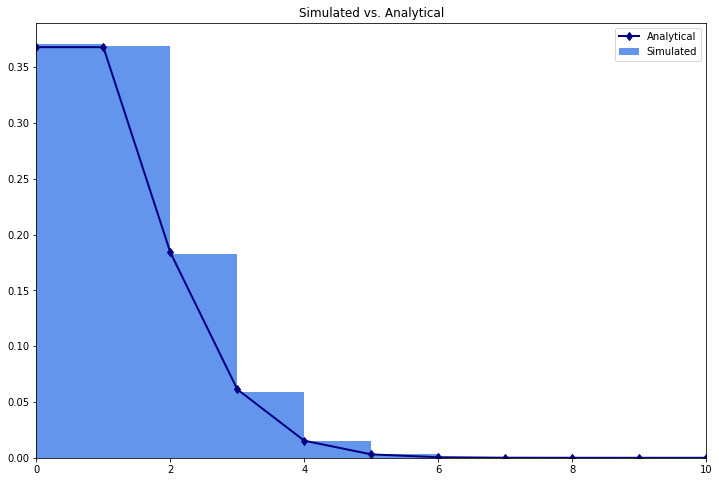

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def party(n):
    """
    Simulate a party with n people who randomly pick their coats. Return number of correctly picked coats.
    """
    guests = list(range(n))
    coats = np.random.permutation(guests)
    return np.sum(guests == coats)


def factorial(x):
    if x == 0:
        return 1
    else:
        res = 1
        for i in range(1,x+1):
            res *= i
        return res
    

def p_r(r,n):
    return (1/factorial(r))*np.sum([(-1)**s / factorial(s) for s in range(n-r+1)])

n = 100 #rager
data = [party(n) for i in range(50000)]

rr = np.array(list(range(n)))
pr = [p_r(r,n) for r in rr]


plt.figure(figsize=(12,8))
_ = plt.plot(rr,pr,'d-',linewidth=2,color='navy')
_ = plt.hist(data,bins=rr,density=True,color='cornflowerblue')


plt.xlim([0,n/10])
plt.title('Simulated vs. Analytical')
plt.legend('Analytical,Simulated'.split(','))